In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
g = 9.81
l = 1
gamma = 0.006
beta = 0.002

theta_0 = 0.01
theta_dot_0 = 0.1 
phi_0 = 0.4
phi_dot_0 = 0.2

variable_list_0 = [theta_0, theta_dot_0, phi_0, phi_dot_0]

In [3]:
def kinetic_equation_of_one_step(t, variable_list):

    theta, theta_dot, phi, phi_dot = variable_list

    matrix_A = np.array([[1+2*beta*(1-np.cos(phi)), -beta*(1-np.cos(phi))],
                         [beta*(1-np.cos(phi)),     -beta                ]])
    
    vector_B = np.array([-beta*np.sin(phi)*(phi_dot**2-2*theta_dot*phi_dot),
                         beta*theta_dot**2*np.sin(phi)                     ])
                         
    vector_C = np.array([beta*g/l*(np.sin(theta-phi-gamma)-np.sin(theta-gamma)-g/l*np.sin(theta-gamma)),
                         beta*g/l*np.sin(theta-phi-gamma)])

    theta_ddot, phi_ddot = np.linalg.solve(matrix_A, -vector_B-vector_C)
    
    return [theta_dot, theta_ddot, phi_dot, phi_ddot]

In [4]:
def heelstrike_event_and_change_defination(t, variable_list):

     theta, theta_dot, phi, phi_dot = variable_list

     matrix_Change = np.array([[-1, 0,                                   0, 0],
                               [0,  np.cos(2*theta),                     0, 0],
                               [-2,  0,                                  0, 0],
                               [0,  np.cos(2*theta)*(1-np.cos(2*theta)), 0, 0]])
     
     variable_matrix = np.array([[theta],
                                 [theta_dot],
                                 [phi],
                                 [phi_dot]])    

     result_matrix = np.dot(matrix_Change, variable_matrix)

     theta = result_matrix[0, 0]
     theta_dot = result_matrix[1, 0]
     phi = result_matrix[2, 0]
     phi_dot = result_matrix[3, 0]

     print(f"*****************************************************************\nt = {t[-1]} \n phi = {phi} \n theta = {theta} \n phi - 2*theta = {phi - 2*theta}\n*****************************************************************\n")

     return [theta, theta_dot, phi, phi_dot]


In [5]:
def monitor(t, variable_list):

    theta, theta_dot, phi, phi_dot = variable_list
    print(f"t = {t} \n phi = {phi} \n theta = {theta} \n phi - 2*theta = {phi - 2*theta}\n")

    return phi - 2*theta

monitor.terminal = True
monitor.direction = -1

In [6]:
t_span = [0, 100]
t_eval = np.linspace(*t_span, 1000)
t_list = np.array([])

theta_list = np.array([])
theta_dot_list = np.array([])
phi_list = np.array([])
phi_dot_list = np.array([])

In [7]:
while True:

    sol = solve_ivp(kinetic_equation_of_one_step, t_span, variable_list_0, events=monitor, dense_output=True, max_step=0.05)

    t = np.linspace(sol.t[0], sol.t[-1], num=100)
    return_variable = sol.sol(t)

    t_list = np.concatenate((t_list, t))

    theta_list = np.concatenate((theta_list, return_variable[0]))
    theta_dot_list = np.concatenate((theta_dot_list, return_variable[1]))
    phi_list = np.concatenate((phi_list, return_variable[2]))
    phi_dot_list = np.concatenate((phi_dot_list, return_variable[3]))

    current_t = t_list[-1]
    current_variable_list = [theta_list[-1], theta_dot_list[-1], phi_list[-1], phi_dot_list[-1]]

    if sol.status == 1:
        new_theta, new_theta_dot, new_phi, new_phi_dot = heelstrike_event_and_change_defination(t, current_variable_list)
        if current_t == t_span[-1]:
            break
        variable_list_0 = [new_theta, new_theta_dot, new_phi, new_phi_dot]
        t_span[0] = sol.t_events[0][0] + 1e-5
    else:
        break


t = 0.0 
 phi = 0.4 
 theta = 0.01 
 phi - 2*theta = 0.38

t = 0.05 
 phi = 0.40526578738616603 
 theta = 0.015010215968313137 
 phi - 2*theta = 0.37524535544953974

t = 0.1 
 phi = 0.4010953246247944 
 theta = 0.020042583914992196 
 phi - 2*theta = 0.36101015679481

t = 0.15000000000000002 
 phi = 0.3876971803215968 
 theta = 0.025099550321678626 
 phi - 2*theta = 0.3374980796782395

t = 0.2 
 phi = 0.3654914283535041 
 theta = 0.030183355506494147 
 phi - 2*theta = 0.3051247173405158

t = 0.25 
 phi = 0.33510434361773267 
 theta = 0.03529597207870908 
 phi - 2*theta = 0.2645123994603145

t = 0.3 
 phi = 0.2973593432235454 
 theta = 0.04043902563997016 
 phi - 2*theta = 0.2164812919436051

t = 0.35 
 phi = 0.2532631655081591 
 theta = 0.045613718720305285 
 phi - 2*theta = 0.1620357280675485

t = 0.39999999999999997 
 phi = 0.20398637009554876 
 theta = 0.05082078085176979 
 phi - 2*theta = 0.10234480839200918

t = 0.44999999999999996 
 phi = 0.1508376174041371 
 theta = 0.05606046486

*****************************************************************
t = 0.4819239659421535 
 phi = -0.11831820822116251 
 theta = -0.059159104110581257 
 phi - 2*theta = 0.0
*****************************************************************

t = 0.4819339659421535 
 phi = -0.11831820822116251 
 theta = -0.059159104110581257 
 phi - 2*theta = 0.0

t = 0.48559147595517227 
 phi = -0.11831425765988857 
 theta = -0.059092884037956935 
 phi - 2*theta = -0.00012848958397469745

t = 0.4819339659421535 
 phi = -0.11831820822116251 
 theta = -0.059159104110581257 
 phi - 2*theta = 0.0

t = 0.48559147595517227 
 phi = -0.11831425765988857 
 theta = -0.059092884037956935 
 phi - 2*theta = -0.00012848958397469745

*****************************************************************
t = 0.4819339659421535 
 phi = 0.11831820822116251 
 theta = 0.059159104110581257 
 phi - 2*theta = 0.0
*****************************************************************

t = 0.4819439659421535 
 phi = 0.11831820822116251 
 t

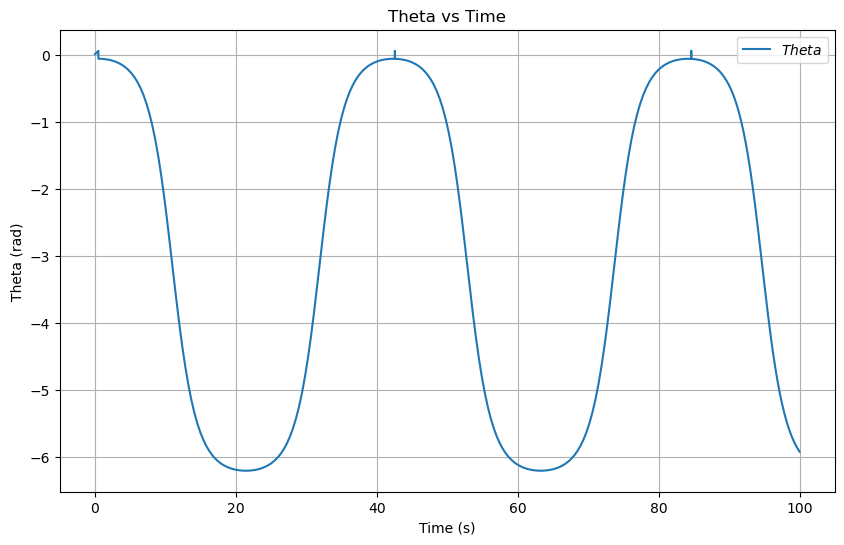

In [8]:
plt.figure(figsize=(10,6))
plt.plot(t_list, theta_list, label="$Theta$")
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Time')
plt.legend()
plt.grid(True)
plt.show()